### Load packages

In [1]:
import numpy as np
import networkx as nx
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
# Create enviroment if not done before. 
#!conda create --name sna --file environment.yml

### Load an concat data

In [3]:
postings_1 = pd.read_csv('input/Postings_01052019_15052019.csv', sep=';')
postings_2 = pd.read_csv('input/Postings_16052019_31052019.csv', sep=';')
votes_1 = pd.read_csv('input/Votes_01052019_15052019.csv', sep=';')
votes_2 = pd.read_csv('input/Votes_16052019_31052019.csv', sep=';')
follow_ignore = pd.read_csv(
    "input/Following_Ignoring_Relationships_01052019_31052019.csv", sep=";")

# Merge the two datasets
postings = pd.concat([postings_1, postings_2])
votes = pd.concat([votes_1, votes_2])


In [4]:
votes.head(2)

,ID_CommunityIdentity,ID_Posting,VoteNegative,VotePositive,VoteCreatedAt,UserCommunityName,UserGender,UserCreatedAt
0,675862,1041076570,1,0,2019-05-06 16:47:46.883,Heckscheibenwischer,m,2018-06-26 06:04:30.513
1,689023,1041076570,1,0,2019-05-01 22:19:06.240,Heinz Fettleber,NaN,2019-03-08 21:23:11.463


In [5]:
postings.head(2)

,ID_Posting,ID_Posting_Parent,ID_CommunityIdentity,PostingHeadline,PostingComment,PostingCreatedAt,ID_Article,ArticlePublishingDate,ArticleTitle,ArticleChannel,ArticleRessortName,UserCommunityName,UserGender,UserCreatedAt
0,1041073586,1.041073e+09,671476,Das hat gestern bereits der Voggenhuber angefü...,schieder hatte dem inhaltlich nichts entgegenz...,2019-05-01 18:21:15.127,2000102330973,2019-05-01 10:28:57.49,1. Mai in Wien: SPÖ fordert von Strache Rücktritt,Inland,Parteien,Ravenspower,NaN,2018-04-14 13:42:28.470
1,1041073839,1.041073e+09,566938,NaN,...und meinen Bezirk bekommst du als Erbe mit.,2019-05-01 18:28:22.040,2000102330973,2019-05-01 10:28:57.49,1. Mai in Wien: SPÖ fordert von Strache Rücktritt,Inland,Parteien,AlphaRomeo,m,2015-08-28 17:07:41.110


/var/folders/5l/vkbvbmf94dg7fjtyqjprh7940000gn/T/ipykernel_25038/792415218.py:3: UserWarning: Attempt to set non-positive ylim on a log-scaled axis will be ignored.
  fig.set_ylim(0, 10000)


(0.6123504061713867, 10000)

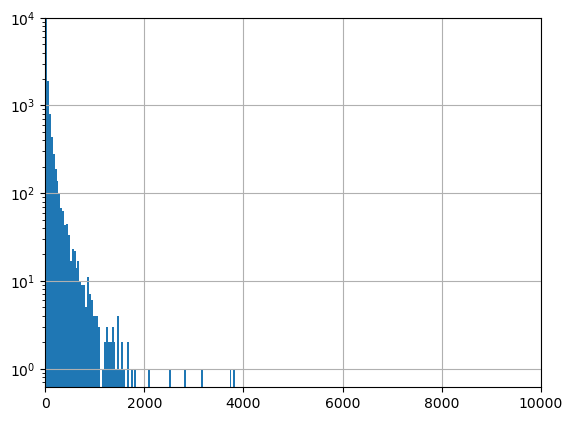

In [50]:
fig = votes.query('VoteNegative == 1')[['ID_CommunityIdentity', 'UserCommunityName']].groupby(['ID_CommunityIdentity', 'UserCommunityName']).size().hist(bins=100, log=True)
fig.set_xlim(0, 10000)
fig.set_ylim(0, 10000)


In [53]:
print(votes.query('VoteNegative == 0')[['ID_CommunityIdentity', 'UserCommunityName']].groupby(['ID_CommunityIdentity', 'UserCommunityName']).size().sum())

3012748


/var/folders/5l/vkbvbmf94dg7fjtyqjprh7940000gn/T/ipykernel_25038/4276300228.py:3: UserWarning: Attempt to set non-positive ylim on a log-scaled axis will be ignored.
  fig.set_ylim(0, 10000)


(0.604109364553706, 10000)

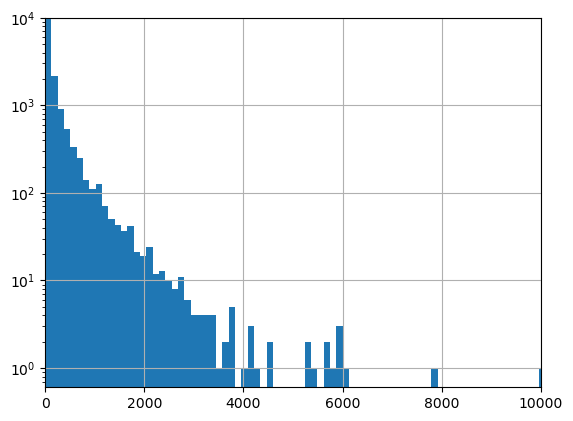

In [51]:
fig = votes.query('VoteNegative == 0')[['ID_CommunityIdentity', 'UserCommunityName']].groupby(['ID_CommunityIdentity', 'UserCommunityName']).size().hist(bins=100, log=True)
fig.set_xlim(0, 10000)
fig.set_ylim(0, 10000)


{'bodies': [<matplotlib.collections.PolyCollection at 0x2815cf190>,
 'cmaxes': <matplotlib.collections.LineCollection at 0x281446150>,
 'cmins': <matplotlib.collections.LineCollection at 0x281618350>,
 'cbars': <matplotlib.collections.LineCollection at 0x2815bfd90>}

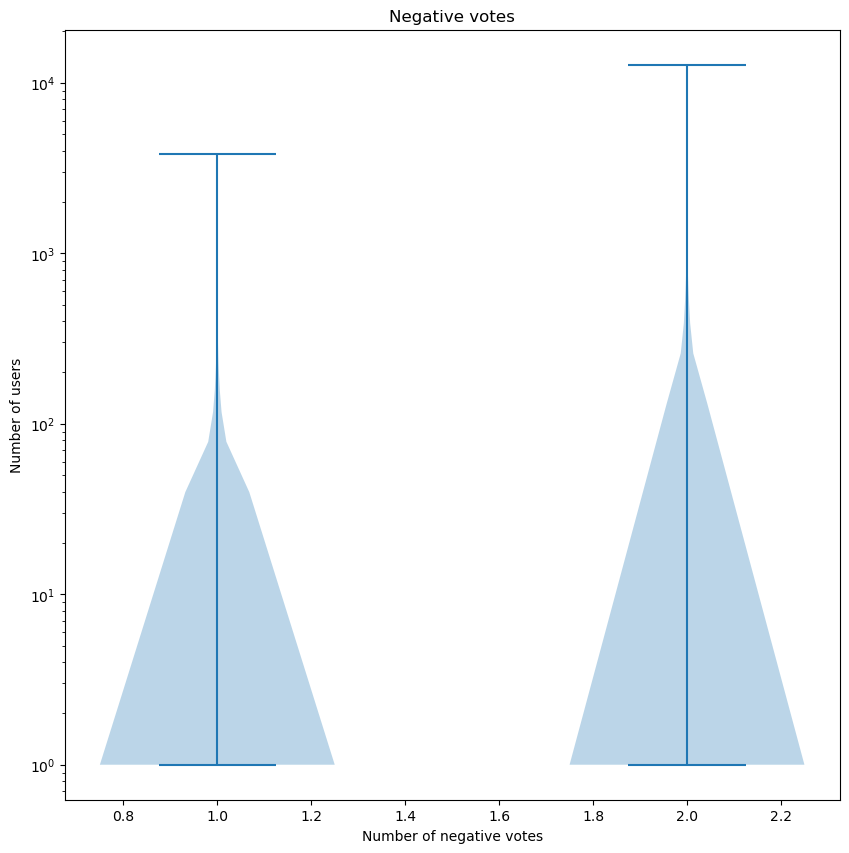

In [33]:
upvotes_count = votes.query('VoteNegative == 1')[['ID_CommunityIdentity', 'UserCommunityName']].groupby(['ID_CommunityIdentity', 'UserCommunityName']).size()
downvotes_count = votes.query('VoteNegative == 0')[['ID_CommunityIdentity', 'UserCommunityName']].groupby(['ID_CommunityIdentity', 'UserCommunityName']).size()

fig, ax = plt.subplots(figsize=(10, 10))
ax.set_title('Negative votes')
ax.set_xlabel('Number of negative votes')
ax.set_ylabel('Number of users')
ax.set_yscale('log')
ax.violinplot([upvotes_count, downvotes_count])

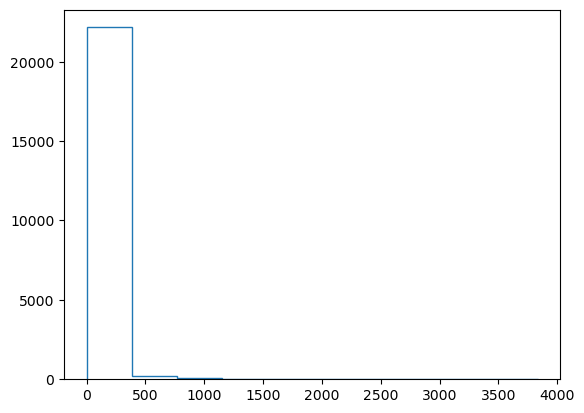

In [19]:
counts, bins = np.histogram(slopes)
plt.stairs(counts, bins)
#plt.axvline(x=mean_slopes)

## Introduction

We want to answer the question if selection and social influence play a role after users first had contact in the Standart Forum. Therefore we need to determine the first contact by two users, this could be done in two ways: 
1. Reply: user a and b first had contact when user a replied to a comment of user b
2. Vote: user a upvoted a comment of user b

Both are forms of explicit feedback which is better than implicit feedback and therefore suitable for this kind of question.

## Define contact by upvote

## Define first contact by reply

In [7]:
# Find u-u tuples with their first date of interaction by reply
first_contact_reply_pairs = (postings.dropna(subset=["ID_Posting_Parent"])[
 ["UserCommunityName", "ID_Posting_Parent", "PostingCreatedAt"]]
 .merge(postings[["ID_Posting", "UserCommunityName"]], left_on=["ID_Posting_Parent"], right_on=["ID_Posting"], how="left")
 [["UserCommunityName_x", "UserCommunityName_y", "PostingCreatedAt"]]
 .sort_values("PostingCreatedAt")
 .groupby(["UserCommunityName_x", "UserCommunityName_y"])
 .first()
 .reset_index())

first_contact_reply_pairs.head(5)


,UserCommunityName_x,UserCommunityName_y,PostingCreatedAt
0,!!!DerAbgrund!!!,Katmai,2019-05-28 08:46:38.747
1,"""UnschuldsVermutung"" die Erste",Bono,2019-05-21 07:10:35.887
2,"""Unschuldsvermutung""",Cabernet Sauvignon,2019-05-10 15:20:14.960
3,"""Unschuldsvermutung""",Jimmy Hey,2019-05-10 15:21:38.460
4,"""mir fällt kein nick ein"" ist schon vergeben",ConanBarbarian,2019-05-28 13:11:37.280


In [8]:
postings.head(2)

,ID_Posting,ID_Posting_Parent,ID_CommunityIdentity,PostingHeadline,PostingComment,PostingCreatedAt,ID_Article,ArticlePublishingDate,ArticleTitle,ArticleChannel,ArticleRessortName,UserCommunityName,UserGender,UserCreatedAt
0,1041073586,1.041073e+09,671476,Das hat gestern bereits der Voggenhuber angefü...,schieder hatte dem inhaltlich nichts entgegenz...,2019-05-01 18:21:15.127,2000102330973,2019-05-01 10:28:57.49,1. Mai in Wien: SPÖ fordert von Strache Rücktritt,Inland,Parteien,Ravenspower,NaN,2018-04-14 13:42:28.470
1,1041073839,1.041073e+09,566938,NaN,...und meinen Bezirk bekommst du als Erbe mit.,2019-05-01 18:28:22.040,2000102330973,2019-05-01 10:28:57.49,1. Mai in Wien: SPÖ fordert von Strache Rücktritt,Inland,Parteien,AlphaRomeo,m,2015-08-28 17:07:41.110


# Build a reply network 

In [9]:
first_contact_reply_pairs = (postings.dropna(subset=["ID_Posting_Parent"])[
 ["ID_CommunityIdentity", "ID_Posting_Parent", "ArticleRessortName"]]
 .merge(postings[["ID_Posting", "ID_CommunityIdentity"]].assign(ID_CommunityIdentity = lambda x: x.ID_CommunityIdentity.astype("Int64")), left_on=["ID_Posting_Parent"], right_on=["ID_Posting"], how="left")
 [["ID_CommunityIdentity_x", "ID_CommunityIdentity_y", "ArticleRessortName"]])
#  .groupby(["ID_CommunityIdentity_x", "ID_CommunityIdentity_y"])
# .size()
#  .reset_index()
#  .rename(columns={0: "count"})
#  .sort_values("count", ascending=False))

first_contact_reply_pairs.to_numpy()

array([[671476, 233191, 'Parteien'],
       [566938, 640123, 'Parteien'],
       [669286, 680772, 'Parteien'],
       ...,
       [553628, 66584, 'Off-Topic'],
       [553628, 65490, 'Off-Topic'],
       [553628, 673428, 'Off-Topic']], dtype=object)

# 

In [10]:
votes_simmilarity = (votes.assign(votes_p_n = lambda x: - x.VoteNegative + x.VotePositive)
    [["ID_CommunityIdentity",	"ID_Posting", "VoteNegative", "VotePositive", "votes_p_n"]]
    .merge(votes[["ID_CommunityIdentity",	"ID_Posting"]], on=["ID_Posting"], how="inner")
    .query("ID_CommunityIdentity_x != ID_CommunityIdentity_y")
    .drop(columns=["ID_Posting"])
    .groupby(["ID_CommunityIdentity_x", "ID_CommunityIdentity_y"])
    .sum()
    .reset_index()
    .sort_values("VoteNegative", ascending=False)
    .assign(votes_p_n = lambda x: x.votes_p_n.abs())
    .assign(votes_p_n_avg = lambda x: (x.VoteNegative / max(x.VoteNegative)) + (x.VotePositive / max(x.VotePositive)) / 2)
    .rename(columns={"VotePositive": "s_upvote", "VoteNegative": "s_downvote", "votes_p_n": "s_summed_votes", "votes_p_n_avg": "s_avg_votes"}))

votes_simmilarity.head(5)

,ID_CommunityIdentity_x,ID_CommunityIdentity_y,s_downvote,s_upvote,s_summed_votes,s_avg_votes
10682178,171380,586763,374,151,223,1.080749
30554760,577975,676477,296,646,350,1.136898
40407350,676477,577975,295,647,352,1.134759
25844039,549309,676477,288,670,382,1.128342
40407122,676477,549309,287,671,384,1.126203


In [26]:
postings

,ID_Posting,ID_Posting_Parent,ID_CommunityIdentity,PostingHeadline,PostingComment,PostingCreatedAt,ID_Article,ArticlePublishingDate,ArticleTitle,ArticleChannel,ArticleRessortName,UserCommunityName,UserGender,UserCreatedAt
0,1041073586,1.041073e+09,671476,Das hat gestern bereits der Voggenhuber angefü...,schieder hatte dem inhaltlich nichts entgegenz...,2019-05-01 18:21:15.127,2000102330973,2019-05-01 10:28:57.49,1. Mai in Wien: SPÖ fordert von Strache Rücktritt,Inland,Parteien,Ravenspower,NaN,2018-04-14 13:42:28.470
1,1041073839,1.041073e+09,566938,NaN,...und meinen Bezirk bekommst du als Erbe mit.,2019-05-01 18:28:22.040,2000102330973,2019-05-01 10:28:57.49,1. Mai in Wien: SPÖ fordert von Strache Rücktritt,Inland,Parteien,AlphaRomeo,m,2015-08-28 17:07:41.110
2,1041073872,1.041069e+09,669286,NaN,"Nein, bei der ÖVP/FPÖ genauso passiert. Ich wo...",2019-05-01 18:29:05.533,2000102330973,2019-05-01 10:28:57.49,1. Mai in Wien: SPÖ fordert von Strache Rücktritt,Inland,Parteien,Hpolditsch,NaN,2018-03-06 20:03:42.737
3,1041080734,1.041080e+09,671476,Sie haben doch nichts gefordert??,sie haben nur die regierung kritisiert. das di...,2019-05-01 22:37:56.010,2000102330973,2019-05-01 10:28:57.49,1. Mai in Wien: SPÖ fordert von Strache Rücktritt,Inland,Parteien,Ravenspower,NaN,2018-04-14 13:42:28.470
4,1041080828,NaN,671476,Heute wäre der perfekte Tag für die SPÖ gewese...,"ihr noch nicht erfülltes versprechen, den silb...",2019-05-01 22:42:06.310,2000102330973,2019-05-01 10:28:57.49,1. Mai in Wien: SPÖ fordert von Strache Rücktritt,Inland,Parteien,Ravenspower,NaN,2018-04-14 13:42:28.470
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
395929,1042380731,1.042380e+09,553628,NaN,Vermutlich gar keines...mir ist jedenfalls kei...,2019-06-04 08:54:54.177,2000103620997,2019-05-24 09:01:27.00,Off-Topic-Forum #123,User,Off-Topic,404 not found,NaN,2014-12-06 15:15:06.280
395930,1042381030,NaN,553628,NaN,*winkt dankbar zur Gödelnummer* Du bist echt d...,2019-06-04 09:04:32.037,2000103620997,2019-05-24 09:01:27.00,Off-Topic-Forum #123,User,Off-Topic,404 not found,NaN,2014-12-06 15:15:06.280
395931,1042381528,1.042381e+09,553628,NaN,"Die sind noch in Arbeit, aber der Surface läuf...",2019-06-04 09:22:54.473,2000103620997,2019-05-24 09:01:27.00,Off-Topic-Forum #123,User,Off-Topic,404 not found,NaN,2014-12-06 15:15:06.280
395932,1042381793,1.042380e+09,553628,NaN,"Ich versteh das überhaupt nicht, warum so viel...",2019-06-04 09:31:45.077,2000103620997,2019-05-24 09:01:27.00,Off-Topic-Forum #123,User,Off-Topic,404 not found,NaN,2014-12-06 15:15:06.280


In [41]:
len(postings.ArticleChannel.unique())

22

<AxesSubplot:>

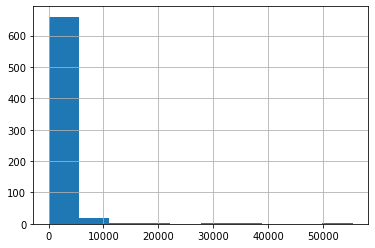

In [51]:
# density plot of ArticleRessortName
postings.ArticleRessortName.value_counts().hist()

In [52]:
postings.ArticleRessortName.value_counts()

Inland                    55394
Österreich                37828
FPÖ                       29440
Kommentare der anderen    20047
Netzpolitik               18760
                          ...  
USA-EssBar                    1
Whatsapp-Updates              1
Tiergärten                    1
Somalia                       1
Axel Springer                 1
Name: ArticleRessortName, Length: 689, dtype: int64

In [ ]:
from wordcloud import WordCloud
from wordcloud import ImageColorGenerator
from wordcloud import STOPWORDS

text = " ".join(i for i in data.text)
stopwords = set(STOPWORDS)
wordcloud = WordCloud(stopwords=stopwords, background_color="white").generate(text)
plt.figure( figsize=(15,10))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

## Disagreement 
when user a has upvoted what user b has downvoted or the opposite.

In [11]:
disagree_tuples = (votes[["ID_CommunityIdentity", "ID_Posting", "VoteNegative"]]
        .merge(votes[["ID_CommunityIdentity", "ID_Posting", "VotePositive", "VoteCreatedAt"]], left_on=["ID_Posting", "VoteNegative"], 
        right_on=["ID_Posting", "VotePositive"], how="inner")
        .query("VoteNegative == 1"))     

disagree_tuples  

,ID_CommunityIdentity_x,ID_Posting,VoteNegative,ID_CommunityIdentity_y,VotePositive,VoteCreatedAt
0,675862,1041076570,1,606376,1,2019-05-01 20:46:16.267
1,689023,1041076570,1,606376,1,2019-05-01 20:46:16.267
47,68791,1041077081,1,216128,1,2019-05-01 20:53:02.410
48,68791,1041077081,1,98636,1,2019-05-01 22:55:47.400
49,68791,1041077081,1,17755,1,2019-05-01 20:39:18.827
...,...,...,...,...,...,...
17376665,220003,1042258888,1,172297,1,2019-05-31 17:04:57.860
17376666,220003,1042258888,1,589243,1,2019-05-31 13:55:38.133
17376667,220003,1042258888,1,523229,1,2019-06-01 03:27:30.897
17376668,220003,1042258888,1,666368,1,2019-05-31 13:32:23.590


In [12]:
top_users = (disagree_tuples
        .groupby(["ID_CommunityIdentity_x", "ID_CommunityIdentity_y"])
        .size()
        .reset_index()
        .rename(columns={0: "s_disagree"})
        .assign(s_disagree = lambda x: - x.s_disagree)
        .sort_values("s_disagree", ascending=True))
        
top_users.head(1)

,ID_CommunityIdentity_x,ID_CommunityIdentity_y,s_disagree
1385665,171380,586763,-369


In [13]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()

merged = votes_simmilarity.merge(top_users, on=["ID_CommunityIdentity_x", "ID_CommunityIdentity_y"], how="inner")[["s_downvote", "s_upvote", "s_summed_votes", "s_avg_votes", "s_disagree"]]
merged_scaled = pd.DataFrame(scaler.fit_transform(merged), columns=merged.columns)

merged_scaled.corr().style.background_gradient(cmap='coolwarm')

,s_downvote,s_upvote,s_summed_votes,s_avg_votes,s_disagree
s_downvote,1.000000,0.549251,0.444426,0.929804,-0.714912
s_upvote,0.549251,1.000000,0.956012,0.818264,-0.210772
s_summed_votes,0.444426,0.956012,1.000000,0.726782,-0.181661
s_avg_votes,0.929804,0.818264,0.726782,1.000000,-0.584615
s_disagree,-0.714912,-0.210772,-0.181661,-0.584615,1.000000


In [14]:
merged = votes_simmilarity.merge(top_users, on=["ID_CommunityIdentity_x", "ID_CommunityIdentity_y"], how="inner").query("ID_CommunityIdentity_x == 171380")

<AxesSubplot:xlabel='s_downvote', ylabel='s_disagree'>

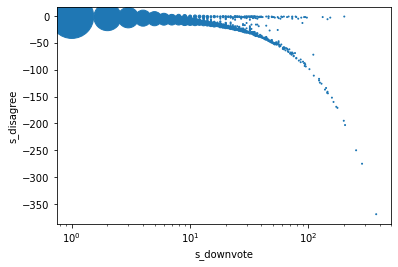

In [15]:
merged[["s_disagree", "s_downvote"]].groupby(["s_disagree", "s_downvote"]).size().reset_index().plot.scatter(x="s_downvote", y="s_disagree", s=0, logx=True)

AxesSubplot(0.125,0.657941;0.168478x0.222059)
AxesSubplot(0.327174,0.657941;0.168478x0.222059)
AxesSubplot(0.529348,0.657941;0.168478x0.222059)
AxesSubplot(0.731522,0.657941;0.168478x0.222059)
AxesSubplot(0.125,0.391471;0.168478x0.222059)
AxesSubplot(0.327174,0.391471;0.168478x0.222059)
AxesSubplot(0.529348,0.391471;0.168478x0.222059)
AxesSubplot(0.731522,0.391471;0.168478x0.222059)
AxesSubplot(0.125,0.125;0.168478x0.222059)
AxesSubplot(0.327174,0.125;0.168478x0.222059)
AxesSubplot(0.529348,0.125;0.168478x0.222059)
AxesSubplot(0.731522,0.125;0.168478x0.222059)


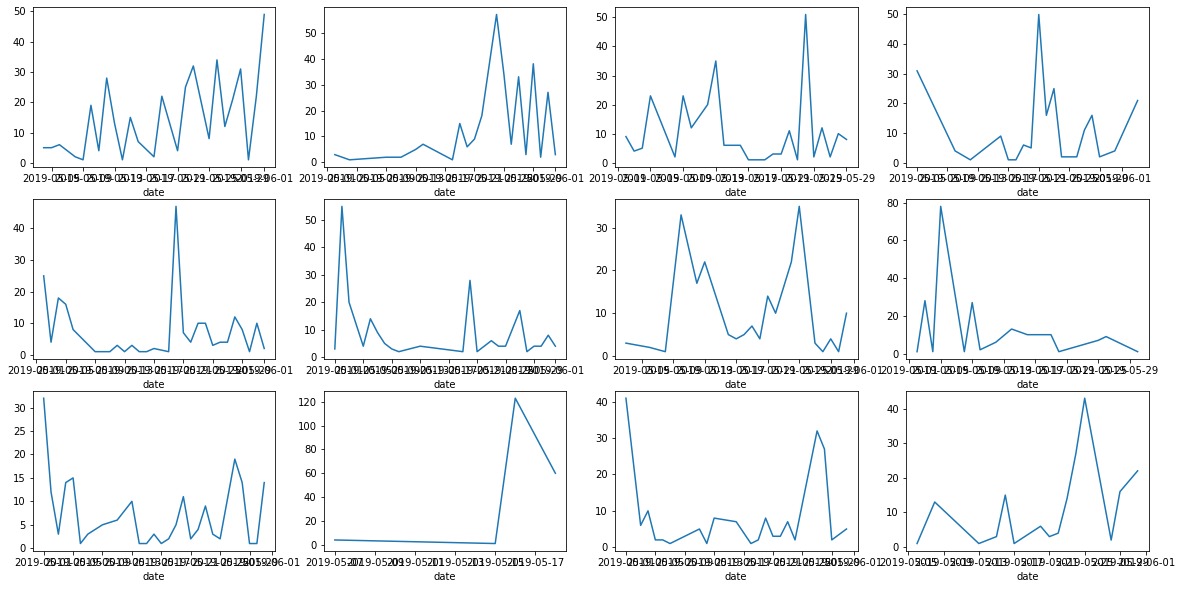

In [16]:
fig, axs = plt.subplots(3, 4)
fig.set_size_inches(20, 10)

for ax, row in zip(fig.get_axes(), list(top_users.itertuples())):
    print(ax)
    user_a = row.ID_CommunityIdentity_x
    user_b = row.ID_CommunityIdentity_y
    (disagree_tuples
        .query("ID_CommunityIdentity_x == @user_a & ID_CommunityIdentity_y == @user_b")
        .assign(date= lambda x: pd.to_datetime(x.VoteCreatedAt).dt.date)
        .groupby("date")
        .size()
        .plot(ax=ax))